In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('churn_prediction.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [7]:
df['churn'].unique()

array([0, 1], dtype=int64)

In [8]:
df['churn'].value_counts()

0    20314
1     4518
Name: churn, dtype: int64

In [9]:
df['churn'].value_counts()/len(df)

0    0.818057
1    0.181943
Name: churn, dtype: float64

In [10]:
X = df.drop(columns = ['churn' , 'customer_id'])
Y = df['churn']

X.shape , Y.shape

((24832, 19), (24832,))

In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [12]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})

C:\Users\ASUS VIVOBOOK 14\AppData\Local\Temp\ipykernel_14416\3642957101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male':0,'Female':1})


In [13]:
df['gender'].unique()

array([0, 1], dtype=int64)

In [14]:
X = df.drop(columns = ['churn','customer_id'])

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24832 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         24832 non-null  int64  
 1   age                             24832 non-null  int64  
 2   gender                          24832 non-null  int64  
 3   dependents                      24832 non-null  float64
 4   occupation                      24832 non-null  object 
 5   city                            24832 non-null  float64
 6   customer_nw_category            24832 non-null  int64  
 7   branch_code                     24832 non-null  int64  
 8   current_balance                 24832 non-null  float64
 9   previous_month_end_balance      24832 non-null  float64
 10  average_monthly_balance_prevQ   24832 non-null  float64
 11  average_monthly_balance_prevQ2  24832 non-null  float64
 12  current_month_credit            

In [17]:
X['occupation'].unique()

array(['self_employed', 'salaried', 'retired', 'student', 'company'],
      dtype=object)

In [18]:
X['occupation'] = X['occupation'].map({'self_employed':0 ,'salaried':1 ,'retired':2 ,'student':3 ,'company':4})
X['occupation'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [19]:
X = X.drop(columns = 'last_transaction')

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
x_train ,x_test ,y_train ,y_test = tts(X ,Y , train_size = 0.80)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((19865, 18), (4967, 18), (19865,), (4967,))

In [23]:
from sklearn.linear_model import LogisticRegression as lr

In [24]:
classifier = lr(class_weight = 'balanced')

In [25]:
classifier.fit(x_train , y_train)

LogisticRegression(class_weight='balanced')

In [26]:
predicted_values = classifier.predict(x_test)

In [27]:
predicted_probabilities = classifier.predict_proba(x_test)

In [28]:
# df1 = pd.DataFrame(columns = {predicted_values:"predicted_values",predicted_probabilities:"predicted_probabilities"})

In [29]:
import numpy as np

In [30]:
predicted_probabilities = np.array(predicted_probabilities)

In [31]:
predicted_values = np.array(predicted_values)

In [32]:
# df1 = pd.DataFrame(columns = {predicted_values:"predicted_values",predicted_probabilities:"predicted_probabilities"})

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
# confusion_matix(y_test , predicted_values)


In [35]:
classifier.score(x_test ,y_test)

0.7731024763438695

In [36]:
from sklearn.metrics import recall_score
recall = recall_score(y_test , predicted_values)
recall

0.6374859708193041

In [37]:
from sklearn.metrics import f1_score
fscore = f1_score(y_test,predicted_values)
fscore

0.5019885108263367

In [38]:
from sklearn.metrics import precision_recall_fscore_support

In [39]:
yo = precision_recall_fscore_support(y_test , predicted_values)
yo

(array([0.91015299, 0.41399417]),
 array([0.80274779, 0.63748597]),
 array([0.85308304, 0.50198851]),
 array([4076,  891], dtype=int64))

In [40]:
from sklearn.metrics import classification_report
k = classification_report(y_test , predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      4076
           1       0.41      0.64      0.50       891

    accuracy                           0.77      4967
   macro avg       0.66      0.72      0.68      4967
weighted avg       0.82      0.77      0.79      4967



In [41]:
predicted_probabilities

array([[0.6043558 , 0.3956442 ],
       [0.4855158 , 0.5144842 ],
       [0.66533615, 0.33466385],
       ...,
       [0.61301986, 0.38698014],
       [0.46517989, 0.53482011],
       [0.58492943, 0.41507057]])

In [42]:
predicted_probabilities.shape

(4967, 2)

In [ ]:
predicted_probabilities[:,1]

In [45]:
from sklearn.metrics import precision_recall_curve

In [48]:
precision_points , recall_points , threshold_points = precision_recall_curve(y_test , predicted_probabilities[:,1] )
precision_points.shape , recall_points.shape , threshold_points.shape

((4968,), (4968,), (4967,))

In [49]:
import matplotlib.pyplot as plt

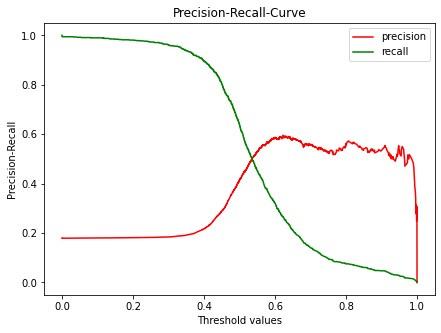

In [54]:
plt.figure(figsize=(7,5))
plt.plot(threshold_points , precision_points[:-1] , color= 'red' , label = 'precision')
plt.plot(threshold_points , recall_points[:-1] , color= 'green' , label = 'recall')
plt.xlabel("Threshold values")
plt.ylabel("Precision-Recall")
plt.title("Precision-Recall-Curve")
plt.legend()
plt.show()


In [59]:
len(precision_points)

4968

In [58]:
len(precision_points[:-1])

4967

In [60]:
from sklearn.metrics import roc_curve , roc_auc_score

In [61]:
fpr , tpr , threshold = roc_curve(y_test , predicted_probabilities[:,1] )

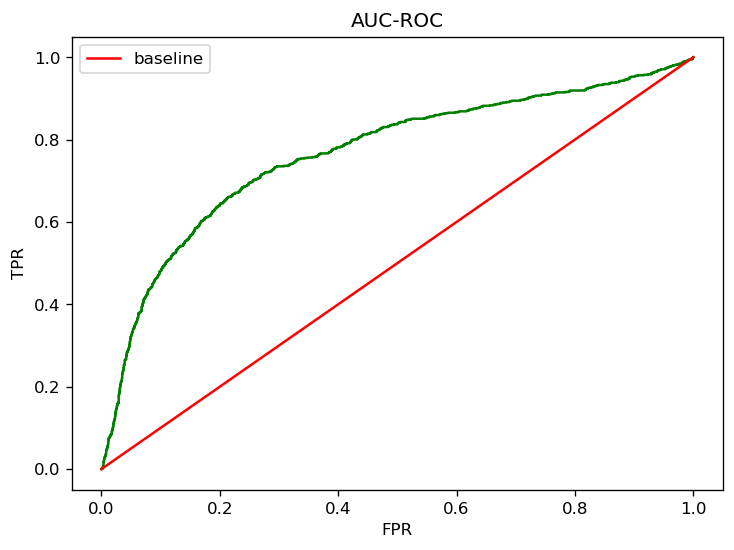

In [67]:
plt.figure(figsize =(7,5) ,dpi = 120)
plt.plot(fpr , tpr ,color = 'green')
plt.plot([0,1],[0,1],label = 'baseline' , color ='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC')
plt.legend()
plt.show()

In [68]:
roc_auc_score(y_test , predicted_probabilities[:,1] )

0.7657121316754945

In [88]:
c = classifier.coef_.reshape(-1)
x = ['vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance']

In [89]:
len(x)

18

In [90]:
coeff_plot = pd.DataFrame({'coefficients':c,'variable':x})
coeff_plot.head()

,coefficients,variable
0,-0.020927,vintage
1,-0.115888,age
2,-0.036665,gender
3,0.052458,dependents
4,-0.097092,occupation


In [91]:
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
8,-2.754982,current_balance
17,-0.517982,previous_month_balance
16,-0.410594,current_month_balance
12,-0.297388,current_month_credit
9,-0.245151,previous_month_end_balance


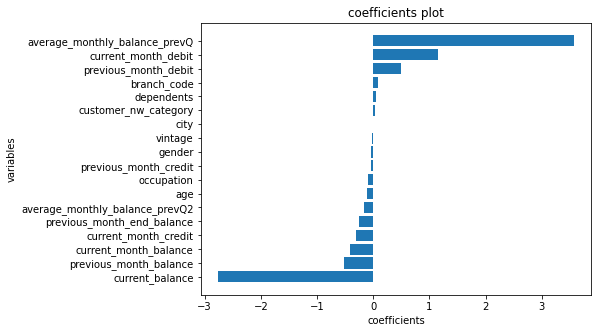

In [95]:
plt.figure(figsize=(7,5))
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel("coefficients")
plt.ylabel("variables")
plt.title("coefficients plot")
plt.show()

<BarContainer object of 18 artists>

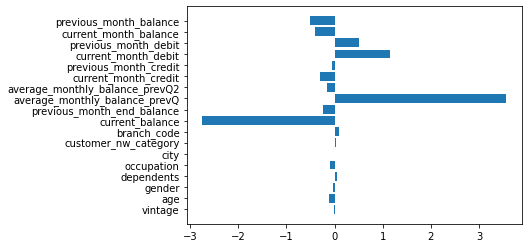

In [97]:
plt.barh(x,c)


In [85]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')